In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/workshop7/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assuming df is already loaded as in the provided code
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7402597402597403


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

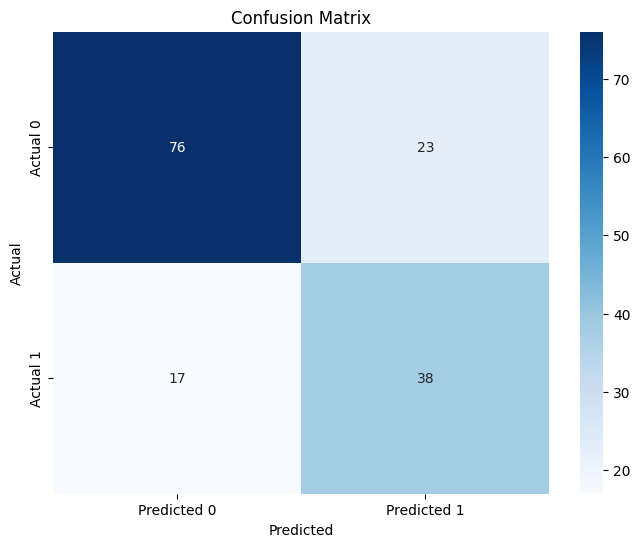

In [4]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
svm_classifier = SVC(kernel='linear')
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(svm_classifier, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         1.         0.96666667 0.93333333 0.96666667]
Mean Accuracy: 0.9733333333333334


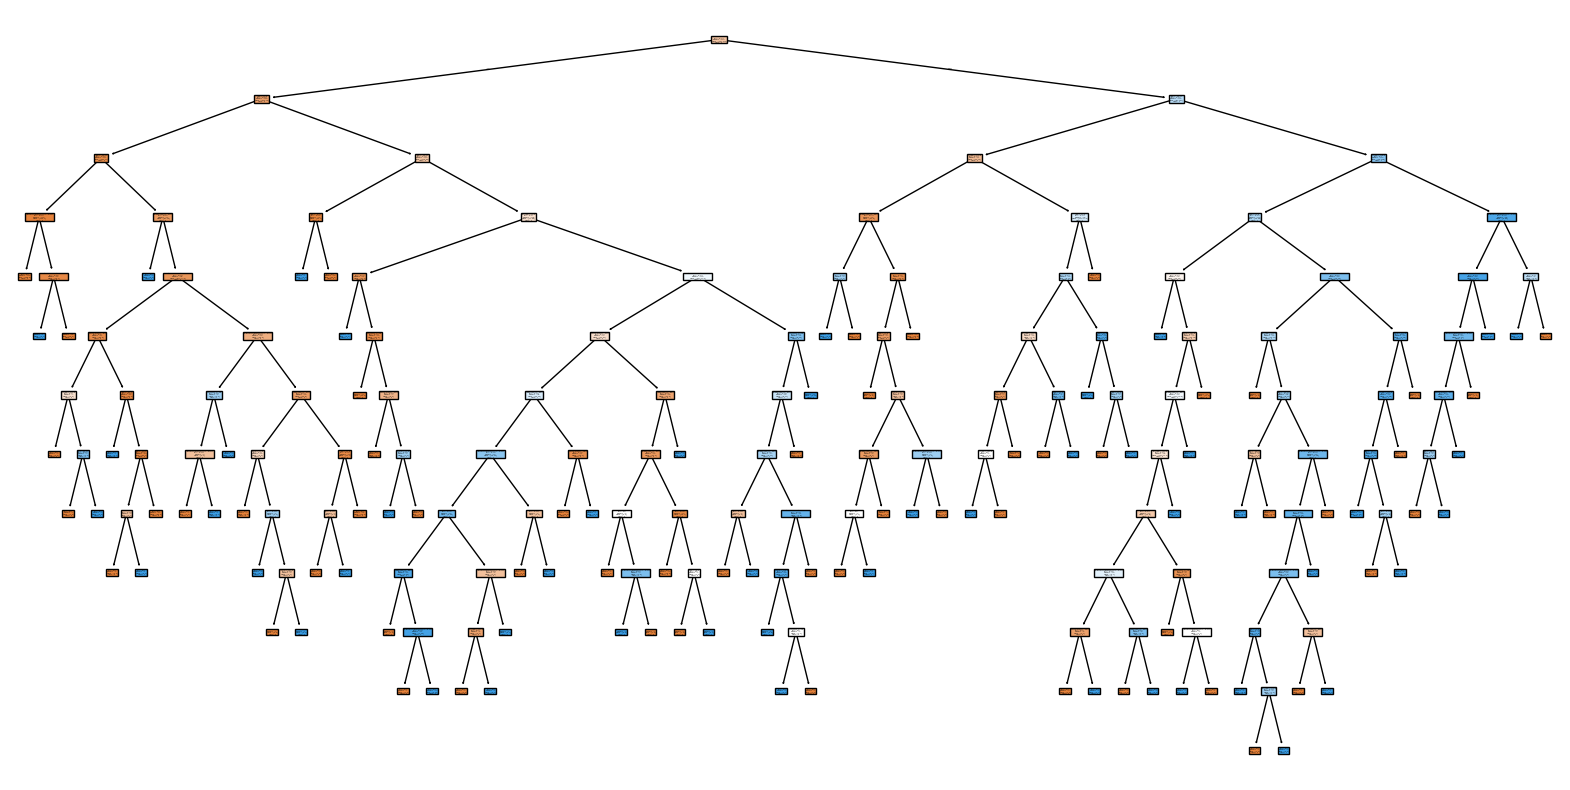

In [8]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names = X.columns, class_names=['0','1'], filled=True)
plt.show()

Accuracy before hyperparameter tuning: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.86      0.78      0.81        99
           1       0.66      0.76      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Accuracy after hyperparameter tuning: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



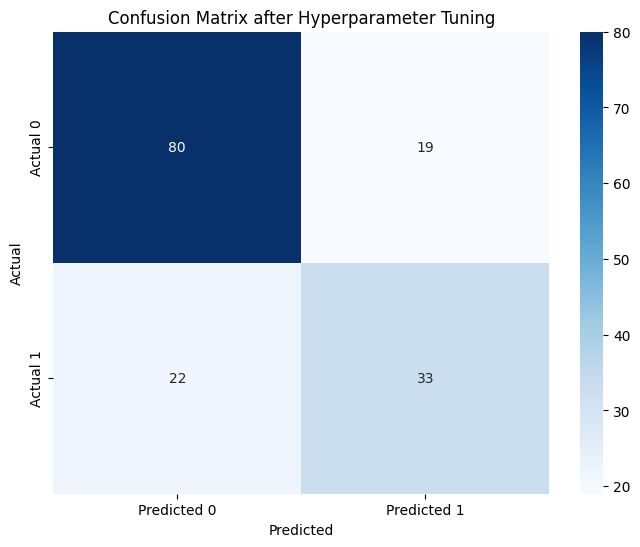

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Prepare data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Decision Tree before hyperparameter tuning
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_before = dt_model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print(f"Accuracy before hyperparameter tuning: {accuracy_before}")
print(classification_report(y_test,y_pred_before))
# Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Decision Tree after hyperparameter tuning
dt_best_model = DecisionTreeClassifier(**best_params)
dt_best_model.fit(X_train, y_train)
y_pred_after = dt_best_model.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print(f"Accuracy after hyperparameter tuning: {accuracy_after}")
print(classification_report(y_test,y_pred_after))


# Confusion Matrix after hyperparameter tuning
cm = confusion_matrix(y_test, y_pred_after)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Hyperparameter Tuning')
plt.show()